In [ ]:
#|default_exp peakpuzzle

# The peak pattern puzzle 

> Matching peak patterns 

In [ ]:
#|hide 
#%matplotlib 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#|hide 
import os

In [ ]:
#|hide 
os.chdir('/home/frank/Work/DATA/maxrf4u-data/')

We now arrive at the central problem of MA-XRF analysis. Given a spectrum with some peaks, and given the theoretical emission peak patterns for different chemical elements, which chemical elements are present in the sample? This is what I call the peak pattern puzzle. 

It is important to note that not all peaks are always due to the actual fluorescence emission of chemical elements present in the scanned object. Other peaks are generated by the instrument itself. And small peaks can also just be noise.  Instrument peaks are common to all spectra.  For example, the large peak observed in all spectra near zero energy is a result of the instrument detector physics. Other peaks above 18 keV are due emission and subsequent scattering of the rhodium anode present in the x-ray tube. 

To simplify our current analysis let's exclude the light elements and rare elements that we do not expect to detect in drawings. You can inspect the Elements Of Interest by importing `EOI`. Elements are excluded from the selection with the `#` sign in front of the chemical symbol. If needed you can add or remove elements by adding or removing the hash sign `#`.  

In [ ]:
from maxrf4u import EOI 

In [ ]:
EOI = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 
       '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', 
       '#Se', 'Br', '#Kr', '#Rb', 'Sr', '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', 
       '#In', 'Sn', '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', '#Ir', 
       '#Pt', 'Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', '#Ac', '#Rf', '#Db', '#Sg', 
       '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', '#Fl', '#Mc', '#Lv', '#Ts', '#Og']

Now to start analyzing our peak pattern puzzle you first need to import and instantiate the `Peak_Pattern_Atlas()` class. You need to provide the `datastack_file=` option to include the instrument pattern in the atlas. Much should be said about the excitation energy `tube_keV`. However I can not elaborate on this topic now. 

In [ ]:
from maxrf4u import Peak_Pattern_Atlas

In [ ]:
ppa = Peak_Pattern_Atlas(elements_of_interest=EOI, datastack_file='RP-T-1898-A-3689.datastack', tube_keV=30)

Please wait while initializing peak pattern atlas...


To activate interactive plotting you need to execute the notebook magic command: 

```python
%matplotlib widget
```

In [ ]:
%matplotlib inline

If it turns out that during your analysis you need to adjust your list of elements of interest you can include or exclude elements with the `Peak_Pattern_Atlas.update()` method. 

In [ ]:
ppa.update_eoi(['Zr', 'Ar'])

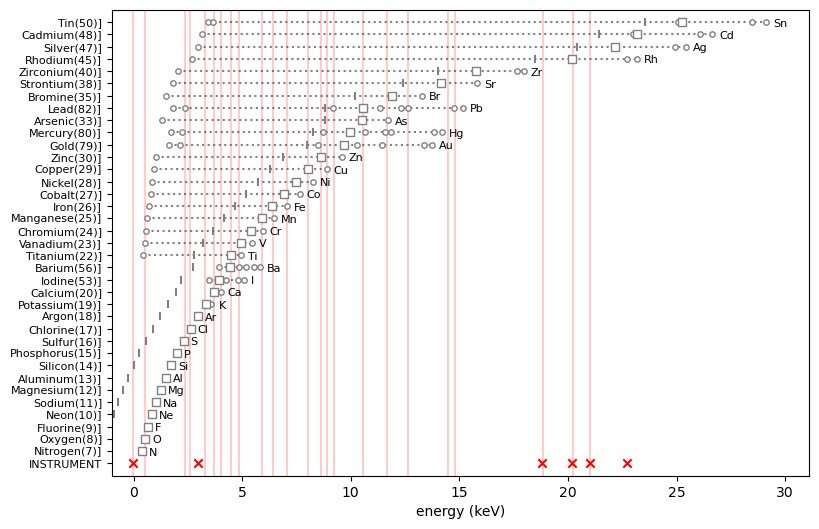

In [ ]:
ppa.plot_patterns()

In the previous section, out of one million spectra, we have cherry picked 22 hotmax spectra and within each spectrum detected potentially significant peaks exceeding the Poisson noise level. We can now proceed to solve the peak pattern puzzle for each hotmax spectrum. In other words, for each spectrum explain the presence of each significant (numbered) peak. Can we attribute a given peak to a specific chemical element, the instrument or noise? 

In other words, we can start to 'explain away' all peaks. It is highly instructive to walk through some interesting hotmax spectra and see which element patterns explain the peak patterns that we observe. To do so you can use the `Peak_Pattern_Atlas.plot_puzzle()` method with the `select_elems=` keyword argument. 

## Exploring the peak pattern puzzle for each hotmax spectrum 

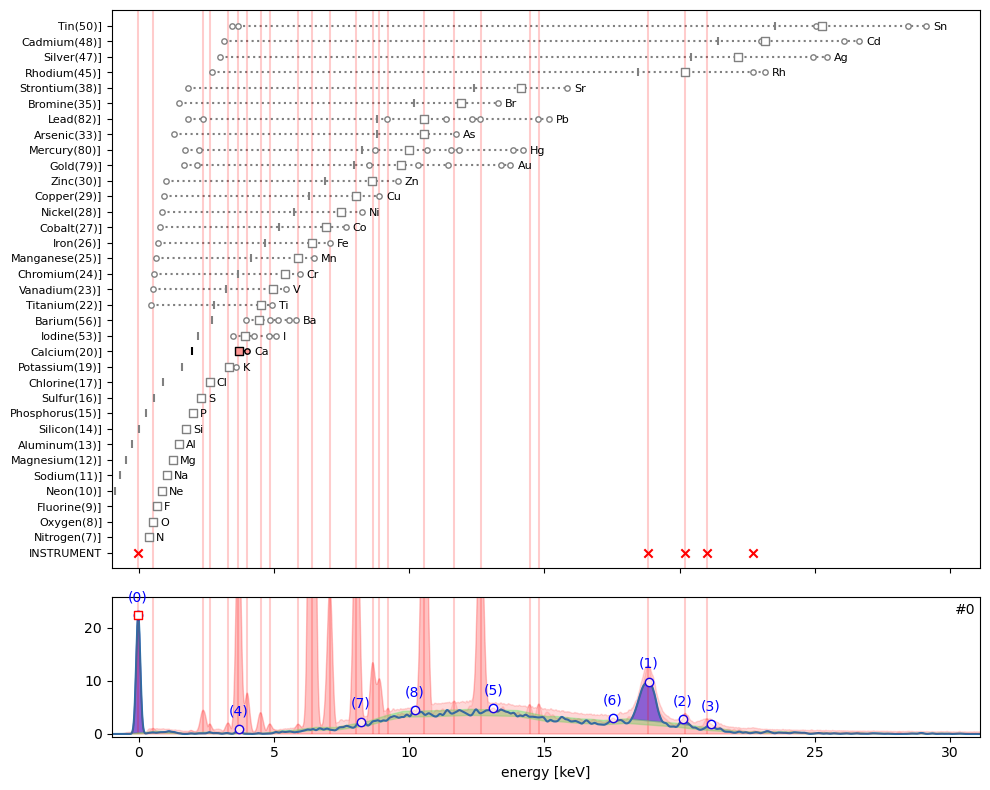

In [ ]:
ppa.plot_puzzle(0, select_elems=['Ca'])

In the puzzle plot for hotmax spectrum **#0** above, beside instrument peaks, all other peaks are rather small. I would say that only sub peak **(4)** can be explained as the $K_{\alpha}$ emission of calcium. 

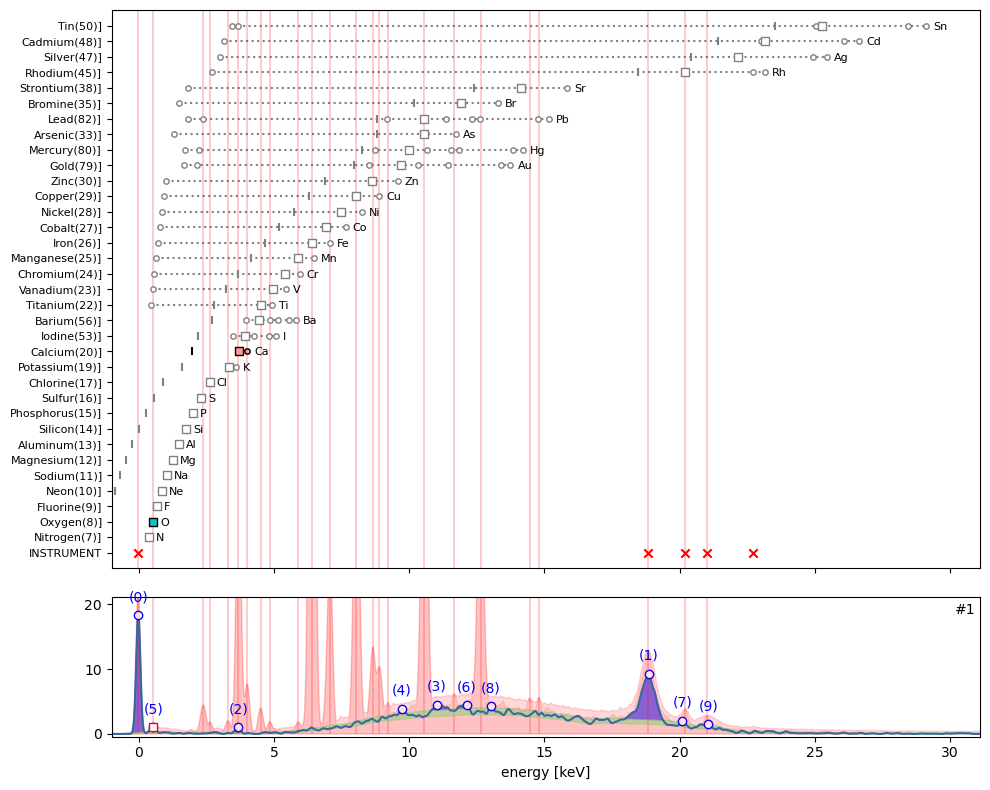

In [ ]:
ppa.plot_puzzle(1, select_elems=['O', 'Ca'])

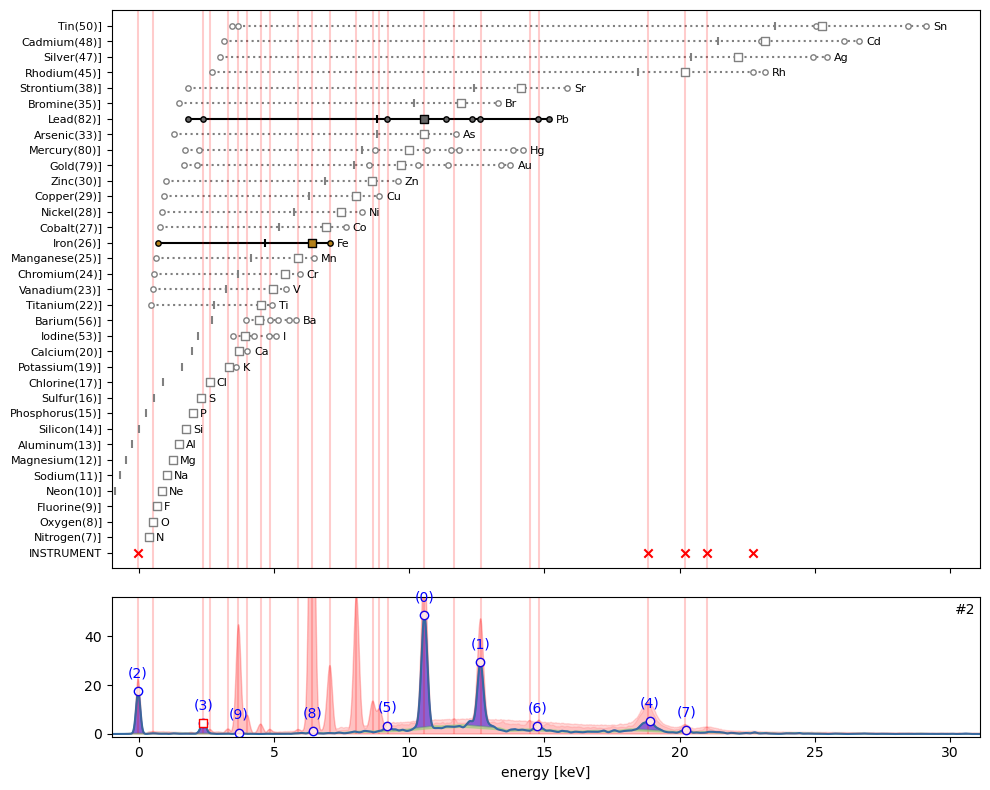

In [ ]:
ppa.plot_puzzle(2, select_elems=['Pb', 'Fe'])

In hotmax spectrum **#2** above, one can see that sub peaks **\(0\)**, **\(1\)**, **\(3\)** and **\(6\)** can all be explained by the emission of lead (Pb). The tiny peaks **\(8\)** and **\(9\)** are explained by respectively iron (Fe) and calcium (Ca).   

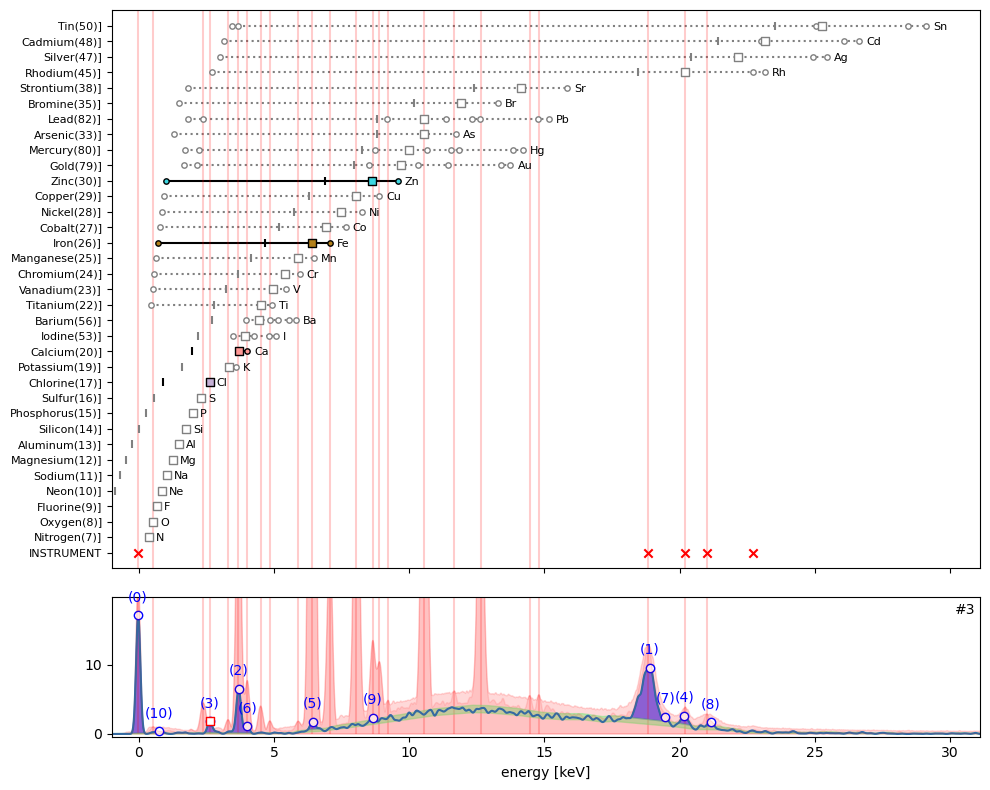

In [ ]:
ppa.plot_puzzle(3, select_elems=['Ca', 'Fe', 'Cl', 'Zn'])

In hotmax spectrum **#3** sub peak **\(3\)** interestingly indicates the presence of chlorine (Cl). Furthermore we find evidence for calcium (Ca), iron (Fe), and perhaps zinc (Zn). 

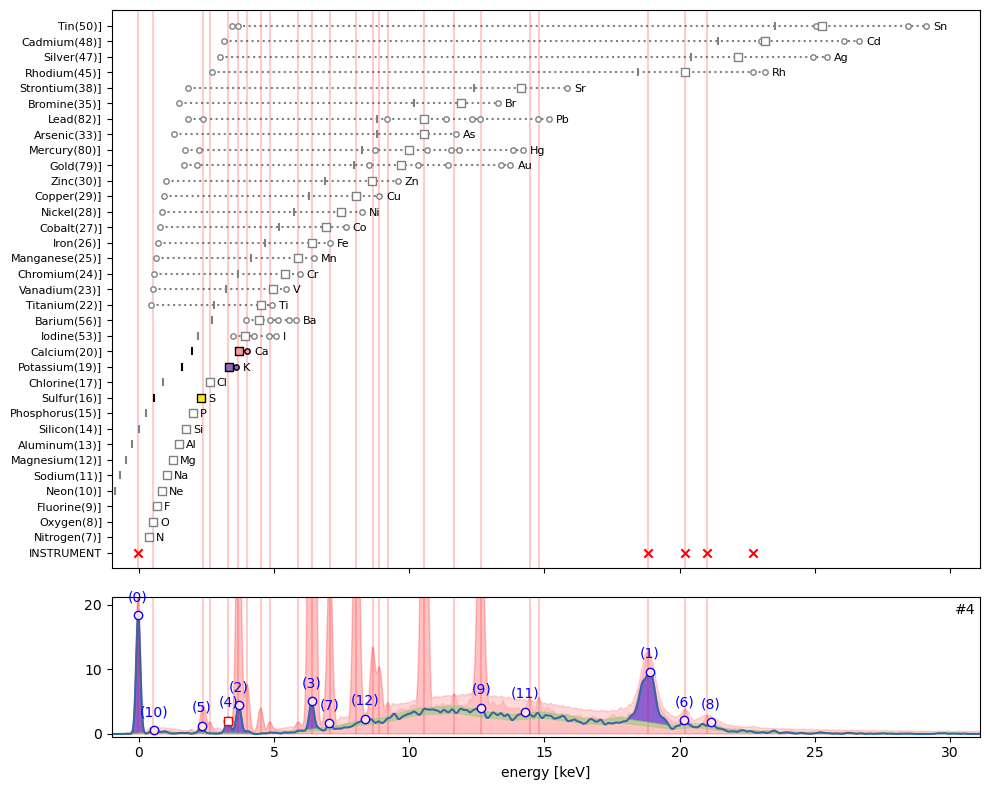

In [ ]:
ppa.plot_puzzle(4, select_elems=['Ca', 'K', 'S'])

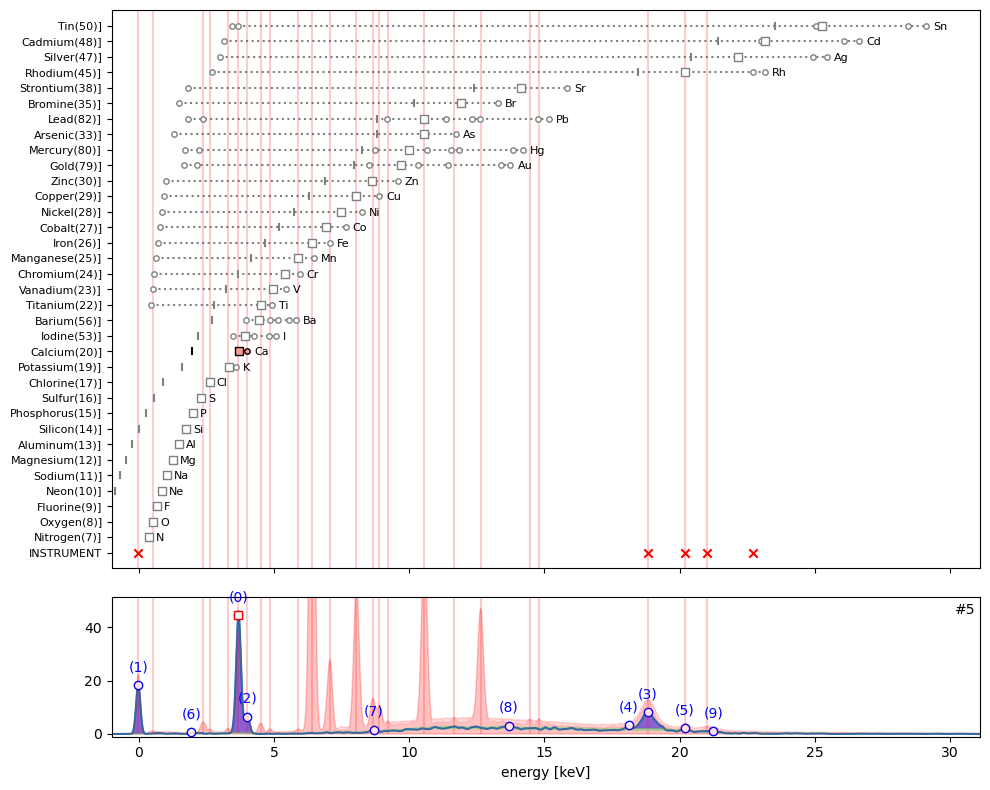

In [ ]:
ppa.plot_puzzle(5, select_elems=['Ca'])

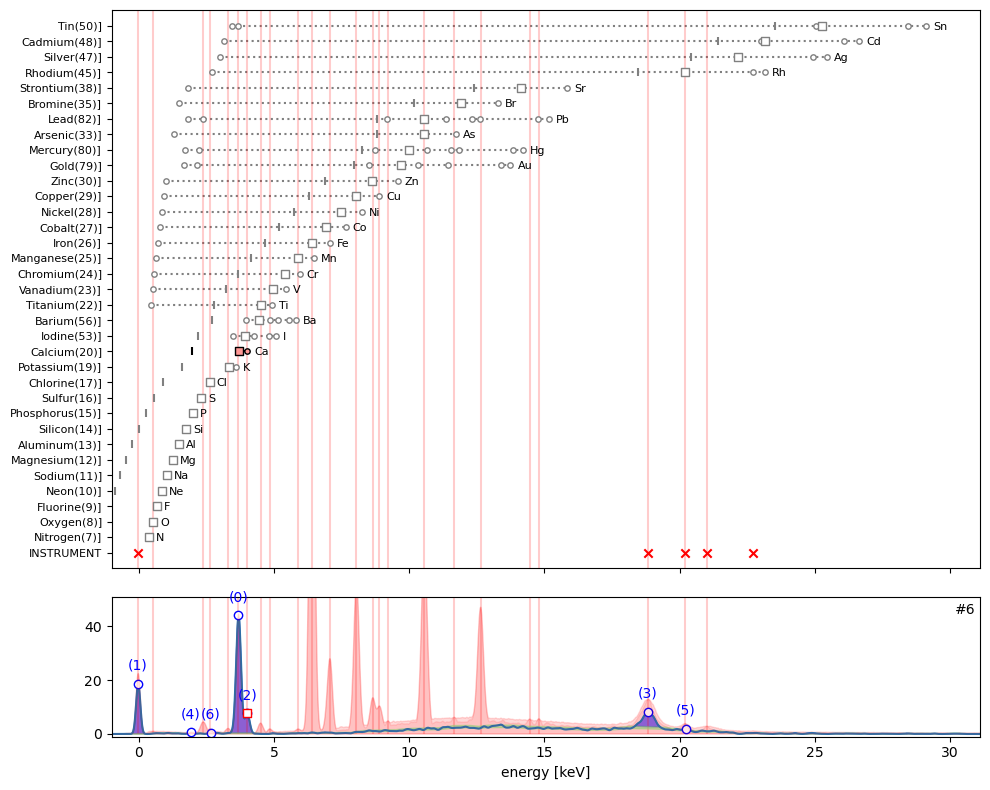

In [ ]:
ppa.plot_puzzle(6, select_elems=['Ca'])

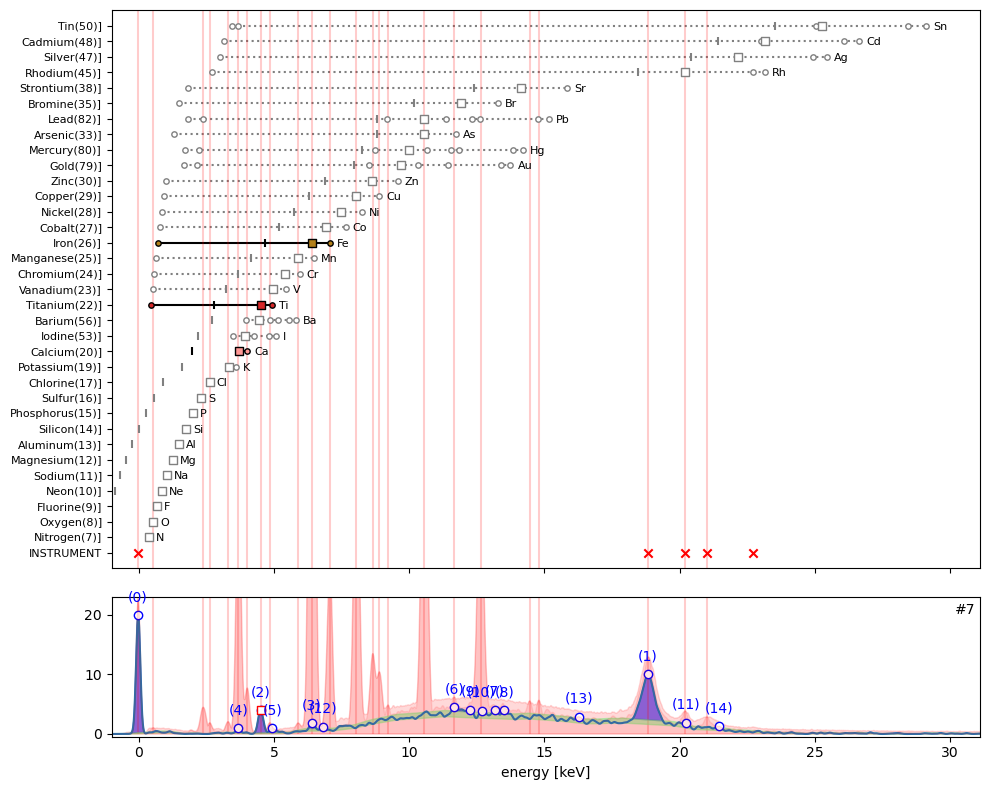

In [ ]:
ppa.plot_puzzle(7, select_elems=['Ca', 'Ti', 'Fe'])

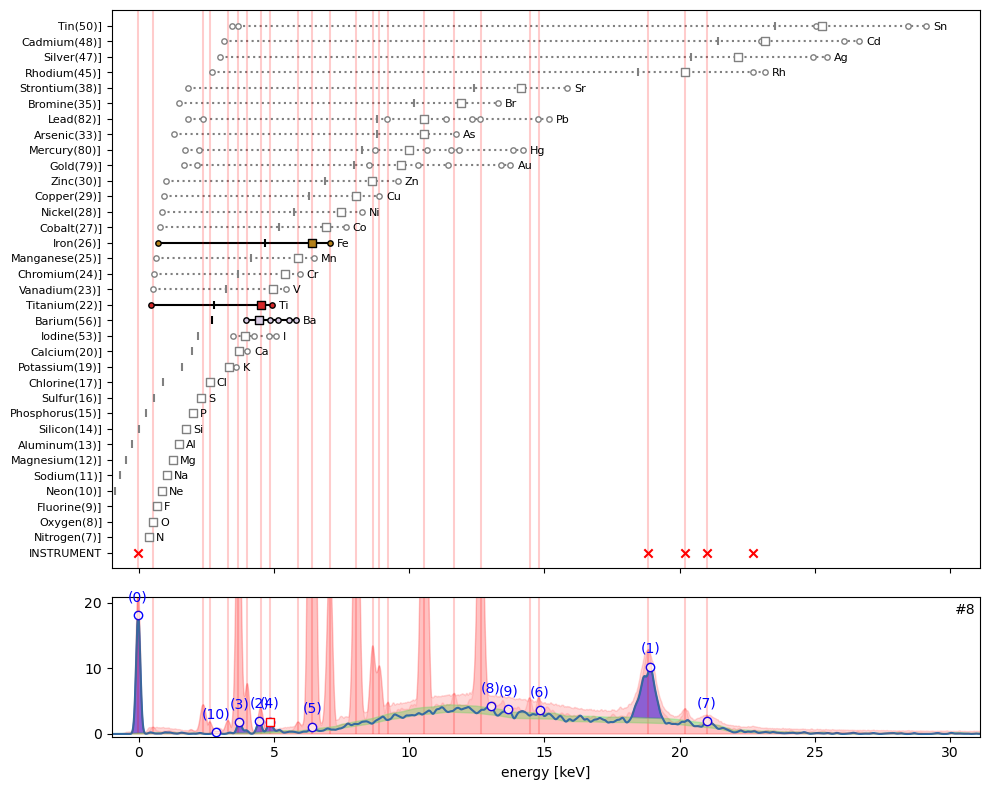

In [ ]:
ppa.plot_puzzle(8, select_elems=['Ti', 'Ba', 'Fe'])

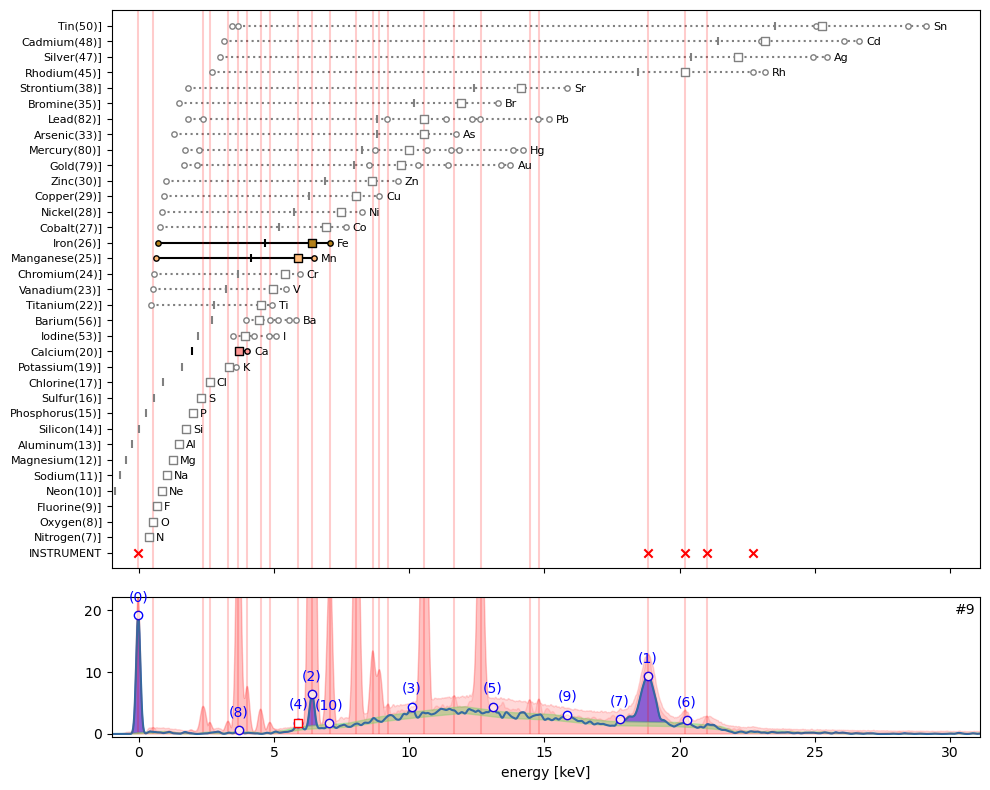

In [ ]:
ppa.plot_puzzle(9, select_elems=['Mn', 'Fe', 'Ca'])

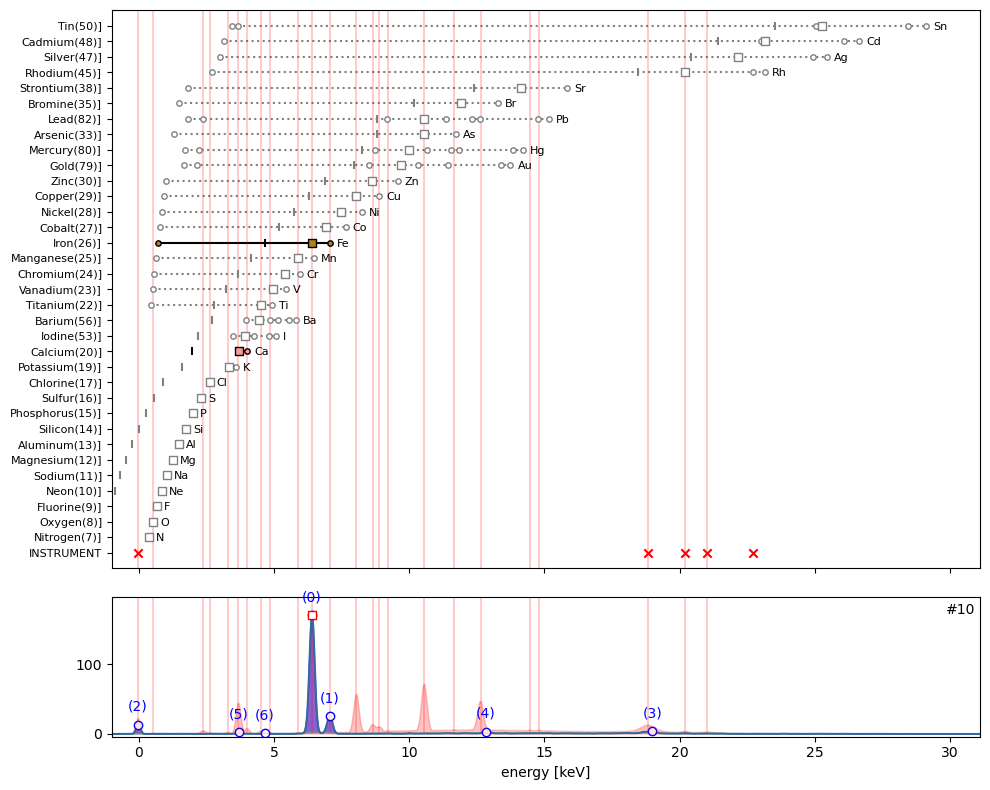

In [ ]:
ppa.plot_puzzle(10, select_elems=['Fe', 'Ca'])

The tiny peak **\(6\)** in hotmax spectrum **#10** is clearly the escape peak for Fe located at 6.40 keV minus 1.74 keV.   

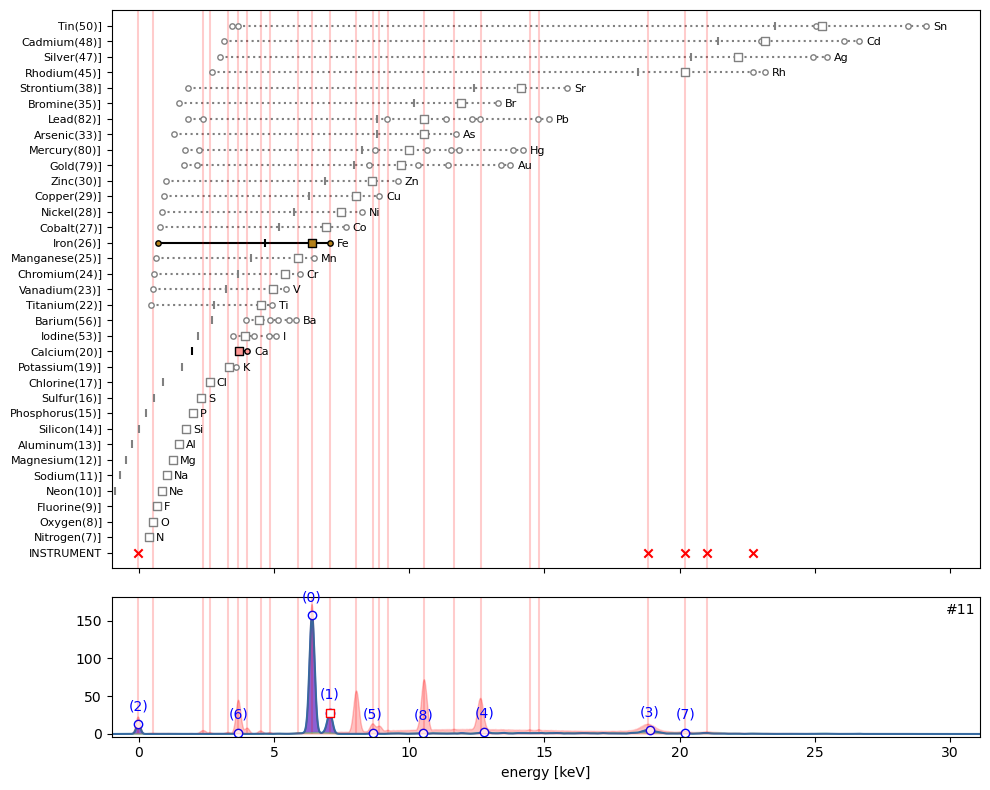

In [ ]:
ppa.plot_puzzle(11, select_elems=['Fe', 'Ca'])

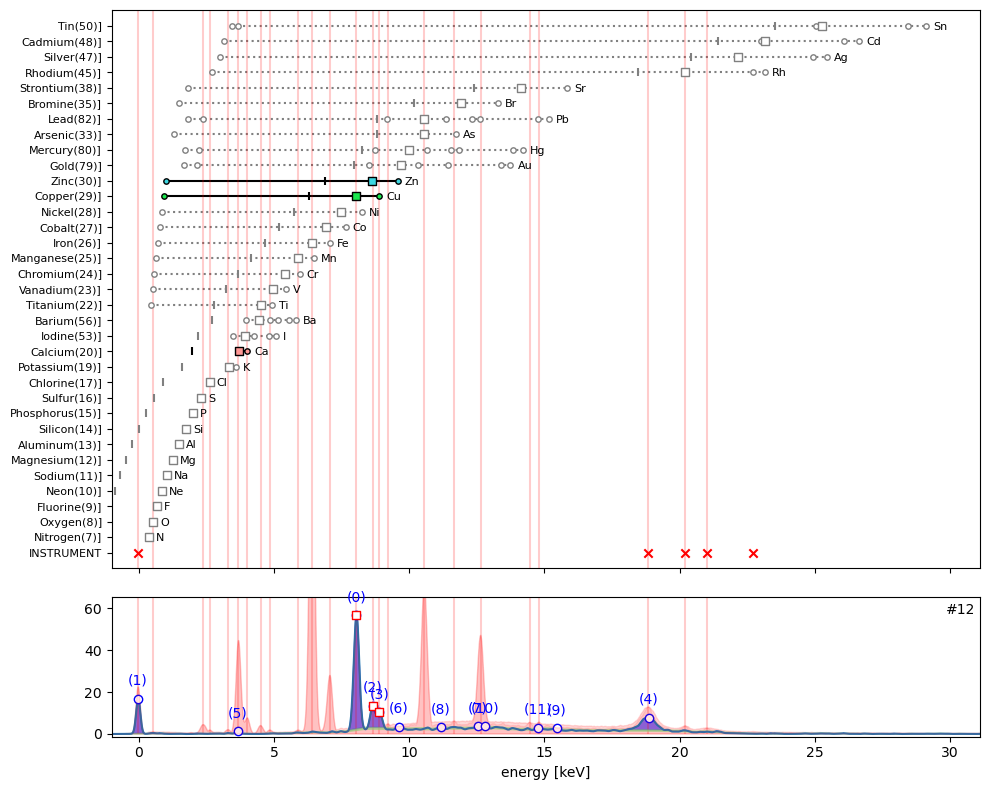

In [ ]:
ppa.plot_puzzle(12, select_elems=['Cu', 'Zn', 'Ca'])

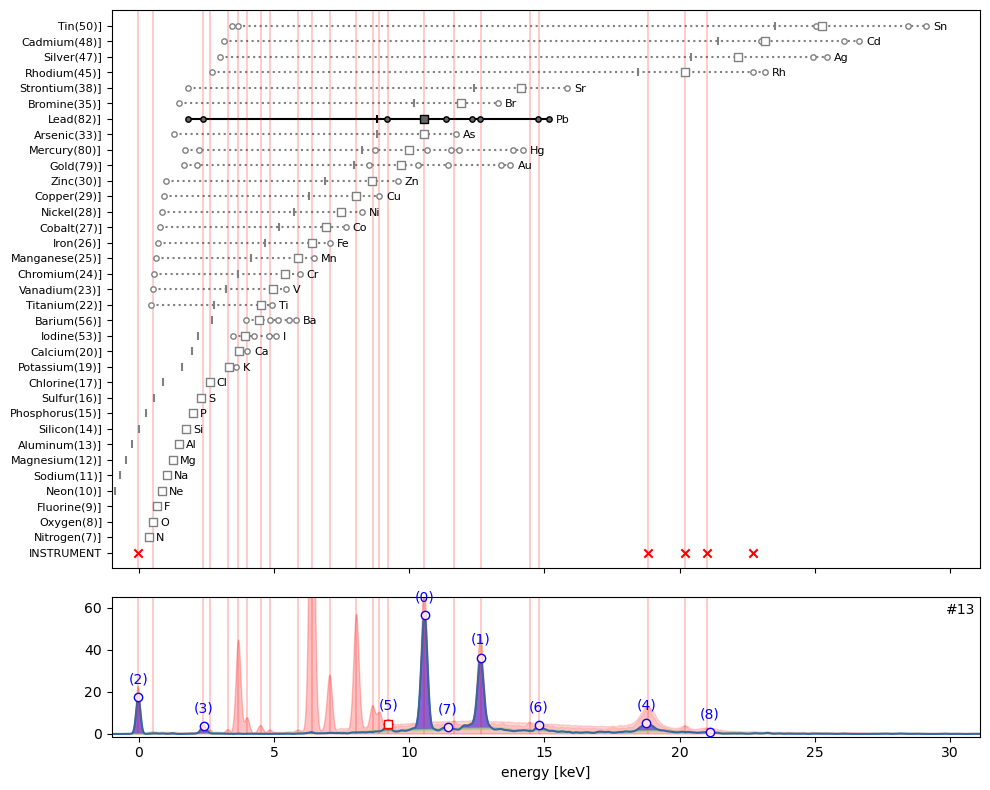

In [ ]:
ppa.plot_puzzle(13, select_elems=['Pb'])

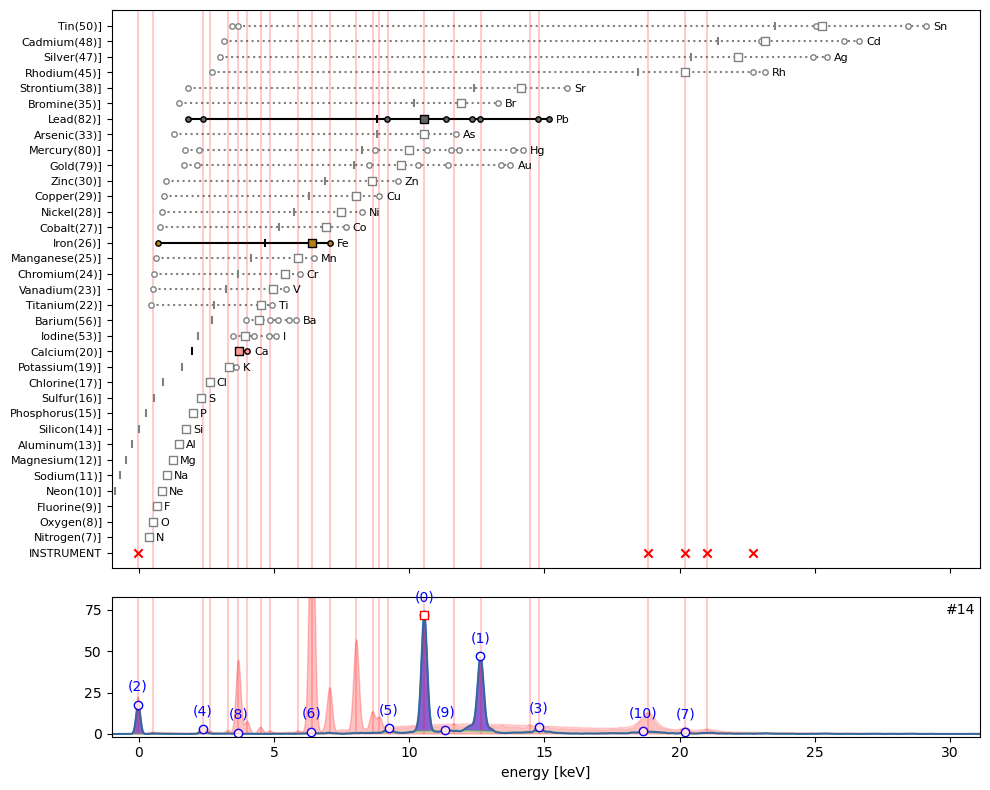

In [ ]:
ppa.plot_puzzle(14, select_elems=['Pb', 'Fe', 'Ca'])

In [ ]:
plt.close('all')

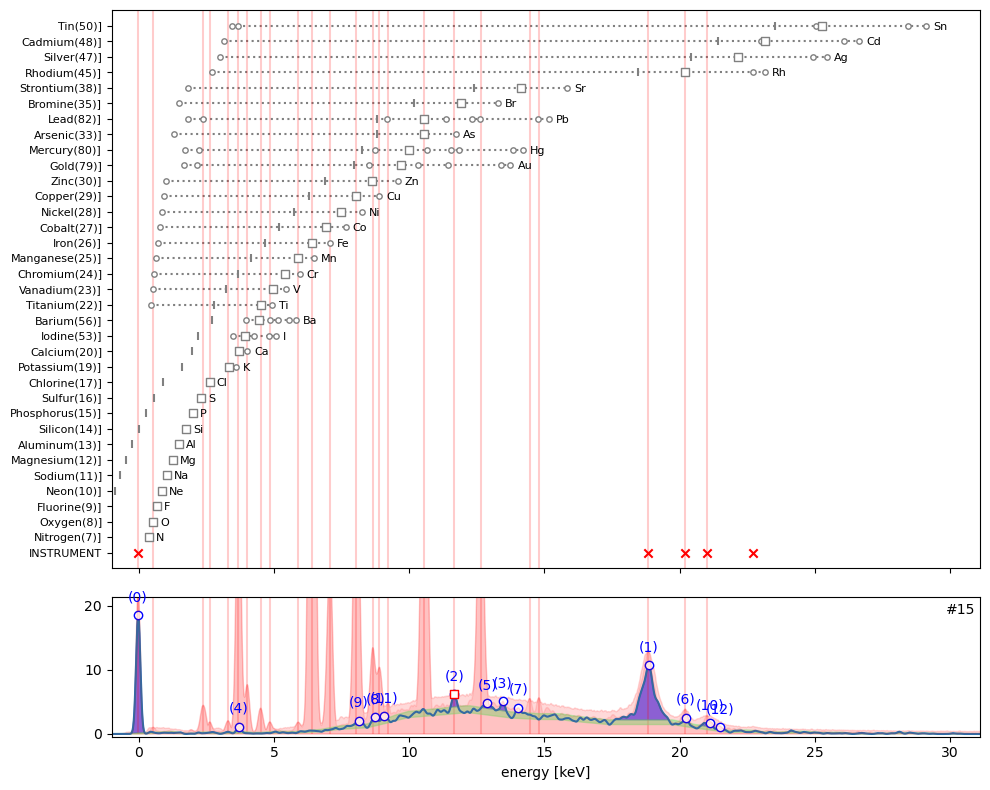

In [ ]:
ppa.plot_puzzle(15, select_elems=[])

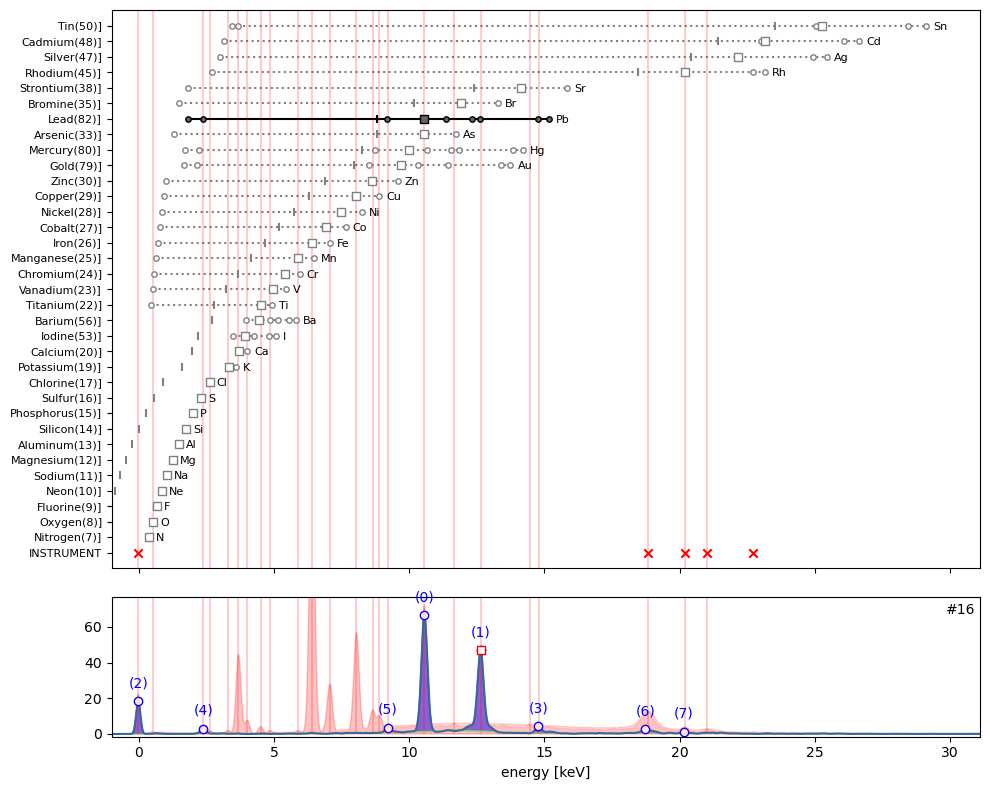

In [ ]:
ppa.plot_puzzle(16, select_elems=['Pb'])

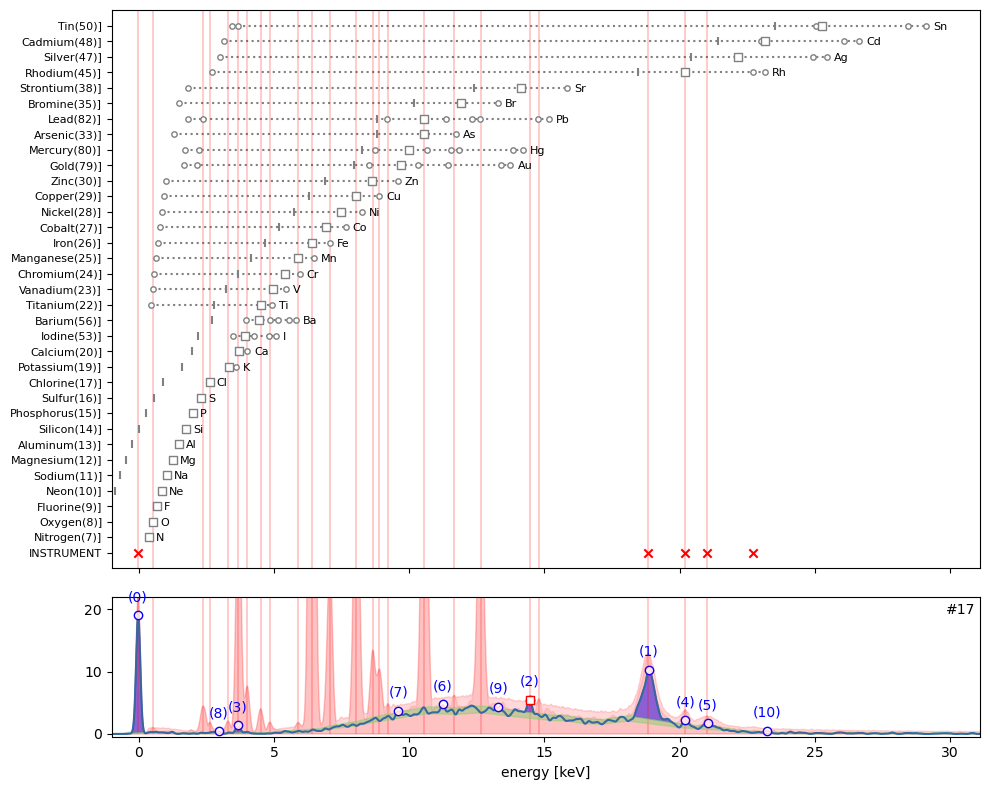

In [ ]:
ppa.plot_puzzle(17, select_elems=[])

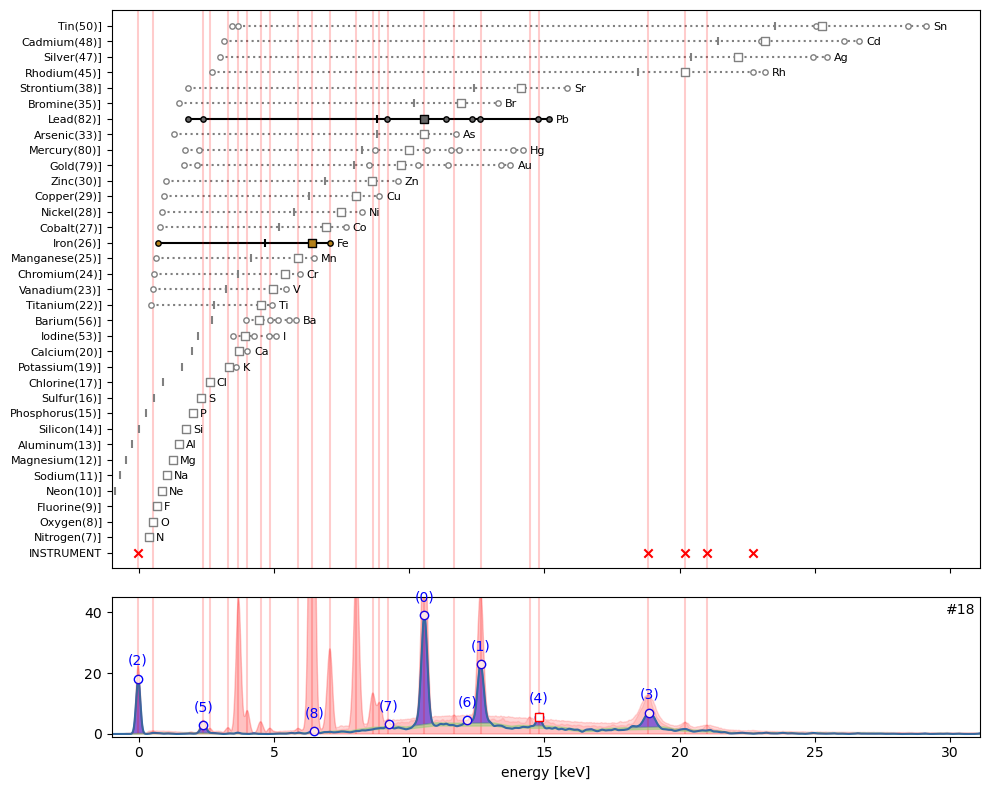

In [ ]:
ppa.plot_puzzle(18, select_elems=['Pb', 'Fe'])

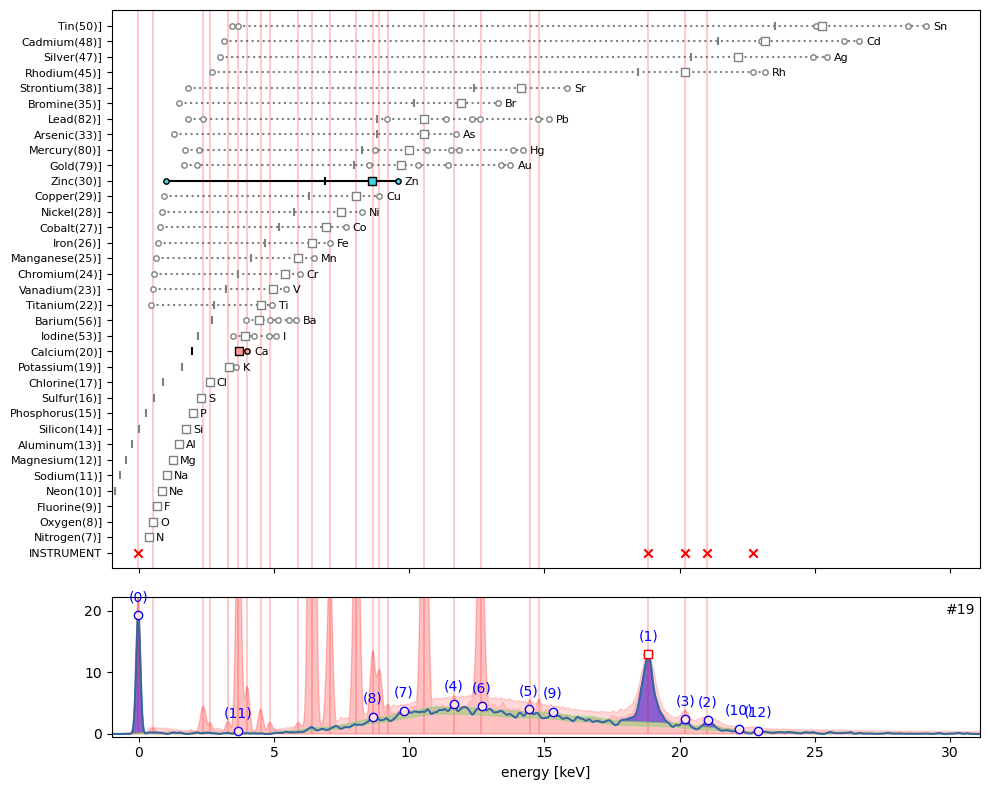

In [ ]:
ppa.plot_puzzle(19, select_elems=['Ca', 'Zn'])

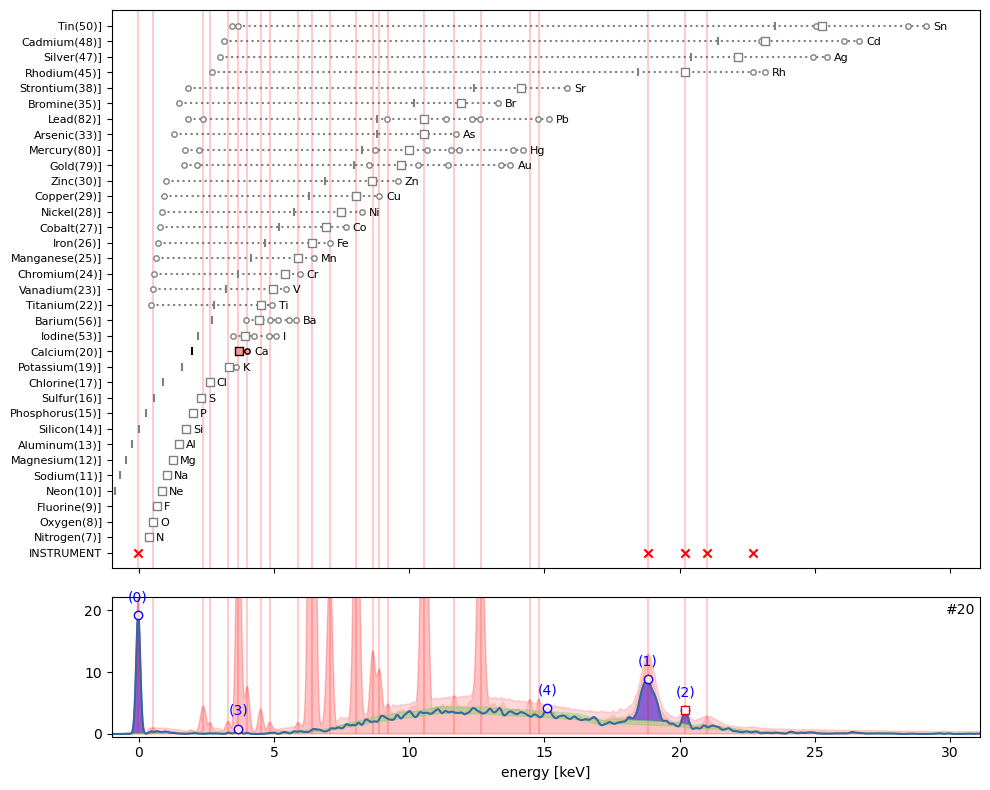

In [ ]:
ppa.plot_puzzle(20, select_elems=['Ca'])

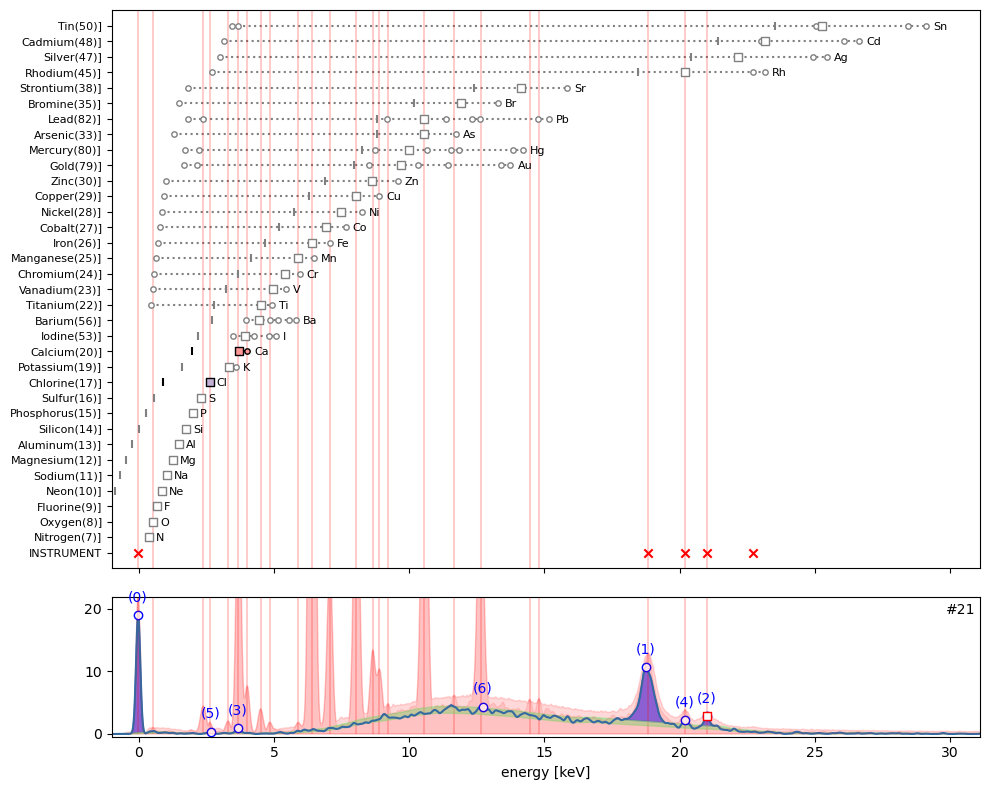

In [ ]:
ppa.plot_puzzle(21, select_elems=['Ca', 'Cl'])

In [ ]:
ppa.contains_dict

{5: ['Ca'],
 0: ['Ca'],
 1: ['O', 'Ca'],
 2: ['Pb', 'Fe'],
 3: ['Ca', 'Fe', 'Cl', 'Zn'],
 4: ['Ca', 'K', 'S'],
 6: ['Ca'],
 7: ['Ca', 'Ti', 'Fe'],
 8: ['Ti', 'Ba', 'Fe'],
 9: ['Mn', 'Fe', 'Ca'],
 10: ['Fe', 'Ca'],
 11: ['Fe', 'Ca'],
 12: ['Cu', 'Zn', 'Ca'],
 13: ['Pb'],
 14: ['Pb', 'Fe', 'Ca'],
 15: [],
 16: ['Pb'],
 17: [],
 18: ['Pb', 'Fe'],
 19: ['Ca', 'Zn'],
 20: ['Ca'],
 21: ['Ca', 'Cl'],
 22: None}

Ok, that is it. Let's summarize which chemical elements we found in our MA-XRF data cube. 

## Summary 

In [ ]:
#|code-fold: true 
import matplotlib.pyplot as plt 
from maxrf4u import DataStack

In [ ]:
#|code-fold: true 
ds = DataStack('RP-T-1898-A-3689.datastack')

x_keVs = ds.read('maxrf_energies') 
y_max = ds.read('maxrf_maxspectrum')

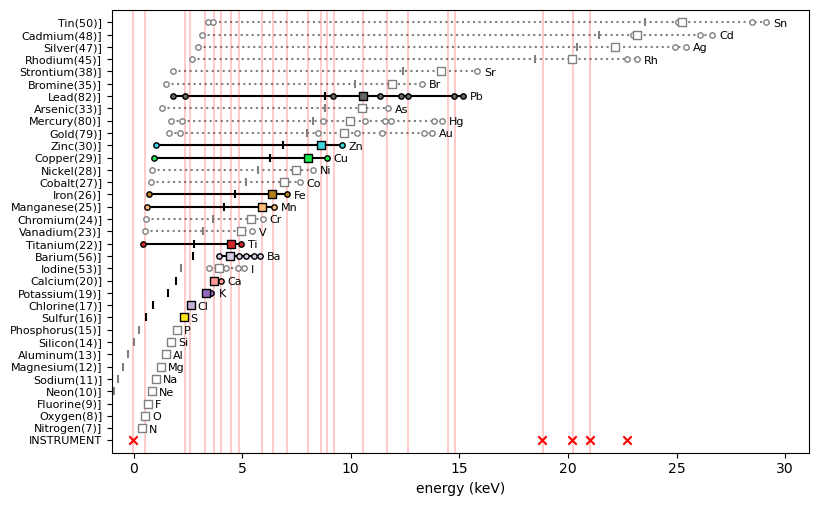

In [ ]:
found_elems = ['S', 'Ca', 'K', 'Cl', 'Fe', 'Mn', 'Cu', 'Zn', 'Pb', 'Ti', 'Ba']
ppa.plot_patterns(select_elems=found_elems)

Altogether the spectral data indicates that 11 chemical elements are present in the Susanna drawing: sulfur (S), chlorine (Cl), potassium (K), calcium (Ca), barium (Ba), titanium (Ti), manganese (Mn), iron (Fe), copper (Cu), zinc (Zn) and lead (Pb). 

In the next section we will look into the spatial distribution of these elements... 

## FUNCTIONS  

In [ ]:
#|export 

import maxrf4u  

from maxrf4u import HotmaxAtlas 
from maxrf4u import DataStack
from maxrf4u.peakmaps import _add_hotlines_ticklabels 

from maxrf4u.xphysics import get_element_spectrum 


import re 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import mendeleev
import moseley as mos
import numpy as np 

In [ ]:
#|export 

class Peak_Pattern_Atlas():
    
    def __init__(self, elements_of_interest=None, tube_keV=40, datastack_file=None, verbose=True): 
        '''Compute atlas of peak patterns for all `elements_of_interest`. '''

        if verbose: 
            print('Please wait while initializing peak pattern atlas...')
        if elements_of_interest == None:             
            self.elements_of_interest = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                                         'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                                         'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
                                         '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
                                         '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
                                         '#Ir', '#Pt', 'Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
                                         '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
                                         '#Fl', '#Mc', '#Lv', '#Ts', '#Og'] 
        else: 
            self.elements_of_interest = elements_of_interest
        self.tube_keV = tube_keV    
        self.eoi_ptrns = get_eoi_patterns(self.elements_of_interest, tube_keV=tube_keV) 
        
        # find right most marker to set plot limit based on pattern atlas 
        self.xmax = max([max(ptrn['peaks_xy'][:, 0]) for ptrn in self.eoi_ptrns])
        
        if datastack_file != None: 
            self.datastack_file = datastack_file 
            self.instrum_ptrn = get_instrument_pattern(datastack_file)
            self.hma = HotmaxAtlas(datastack_file)
            self.contains_dict = {}
            
        else:
            self.instrum_ptrn = None 

    def update_eoi(self, add_elems): 
        '''Update elements of interest and corresponding eoi_ptrns . '''

        self.elements_of_interest = update_eoi(self.elements_of_interest, add_elems)
        self.eoi_ptrns = get_eoi_patterns(self.elements_of_interest, tube_keV=self.tube_keV) 
        self.xmax = max([max(ptrn['peaks_xy'][:, 0]) for ptrn in self.eoi_ptrns])
        
        
                         
    def plot_patterns(self, select_elems=None, ax=None): 
        '''
        Plot peak patterns for list of elements `plot_elems`.
        '''

        self._ax = plot_patterns(self.eoi_ptrns, select_elems=select_elems, instrum_ptrn=self.instrum_ptrn, ax=ax)
        ymin, ymax = self._ax.get_ylim()
        
        # add max spectrum vlines in pattern plot 
        if True: #isinstance(self.hma, HotmaxAtlas):
            self.lines_x = self.hma.x_keVs[self.hma.hotmax_peak_idxs_flat]
            self._ax.vlines(self.lines_x, ymin=ymin, ymax=ymax, color='r', alpha=0.2, zorder=-10) 
            
        self._ax.set_xlim([-1, self.xmax + 2])   



    def plot_puzzle(self, spectrum_n, select_elems=None): 
        
        # store selected elements for spectrum n
        self.contains_dict[spectrum_n] = select_elems

        fig, axs = plt.subplots(nrows=2, figsize=[10, 8], sharex=True, height_ratios=[4, 1])
        
        ax0, ax1 = axs.flatten()
        
        self.plot_patterns(select_elems=select_elems, ax=ax0) 
        ax, labels = self.hma.plot_spectrum(spectrum_n, ax=ax1, xlim_padding=None)
        ax1.set_xlabel('energy [keV]')
        plt.subplots_adjust(hspace=0.02)

        plt.tight_layout()

        


def plot_patterns(eoi_ptrns, select_elems=None, instrum_ptrn=None, ax=None): 
    '''Wrapper function to plot overview of element patterns `elem_ptrns` and instrument patterns in axes `ax`. 
   
    Returns: `ax` 
    ''' 

    # select all elements if None
    if select_elems == None: 
        select_elems = []
    #else: 
    #
    #    # underscore implies grey color 
    #    greyed_elems = [re.sub('_', '', elem) for elem in plot_elems if '_' in elem] #  
    #     
    #    # remove underscores and create selected elements pattern list to plot 
    #    selected_elems = [re.sub('_', '', elem) for elem in plot_elems] # unsorted! 
    #    ptrns = [ptrn for ptrn in eoi_ptrns if ptrn['elem'] in selected_elems] # sorted 

    elements = [ptrn['elem'] for ptrn in eoi_ptrns]
    names = [ptrn['name'] for ptrn in eoi_ptrns]
    Z = [ptrn['atomic_number'] for ptrn in eoi_ptrns]
    
    
    ytick_labels = [f'{n}({z})]' for n, z in zip(names, Z)] 
    
    n_ptrns = len(eoi_ptrns)
    n_ticks = n_ptrns 
    offset = 0 

    
    # create extra vertical space in plot 
    if instrum_ptrn != None: 
        
        # add space for instrument pattern 
        n_ticks += 1 
        offset = 1 
        ytick_labels = ['INSTRUMENT'] + ytick_labels 
        
    # now create plot    
    if ax is None:  
        fig_width = 9
        fig_height = 0.15 * n_ticks + 0.5 
        fig, ax = plt.subplots(figsize=[fig_width, fig_height])  
        ax.set_xlabel('energy (keV)')
            
    # plot instrument pattern X X X 
    if instrum_ptrn != None: 
        instr_peaks = instrum_ptrn['instrument_peaks']
        instr_zeros = np.zeros_like(instr_peaks) 
        ax.scatter(instr_peaks, instr_zeros, marker='x', color='r')   
    
    # plot element patterns     
    for i, ptrn in enumerate(eoi_ptrns):        
        element = ptrn['elem']
        x, _ = ptrn['peaks_xy'].T
        y = np.zeros_like(x) + i + offset
        color = ptrn['color']
        if element in select_elems: 
            facecolor = color 
            edgecolor = 'k'
            linecolor = color
            linestyle = '-'
        else: 
            facecolor = 'w'
            edgecolor = 'grey'
            linecolor = 'grey'
            linestyle = ':'
            

        alpha_escape_keV = ptrn['alpha_escape_keV']
         
        left_x = min(x)
        right_x = max(x)
        
        ax.scatter(x, y, s=15, facecolor=facecolor, edgecolor=edgecolor)
        ax.scatter(x[0], y[0], marker='s', facecolor=facecolor, edgecolor=edgecolor)
        ax.plot([left_x, right_x], [y[0], y[0]], color=edgecolor, linestyle=linestyle, zorder=-10)
        ax.scatter(alpha_escape_keV, y[0], marker='|', color=edgecolor) 
        ax.annotate(element, [right_x, y[0]], xytext=[5, -1], fontsize=8, color='k', 
                    textcoords='offset points', ha='left', va='center') 
                  
    ax.set_yticks(range(n_ticks))        
    ax.set_yticklabels(ytick_labels, fontsize=8) 
        
    ax.set_ylim([-1, n_ticks])
    
    return ax 




#|export 

# all elements 
EOI = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
       'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
       'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
       '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
       '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
       '#Ir', '#Pt', 'Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
       '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
       '#Fl', '#Mc', '#Lv', '#Ts', '#Og']


def get_eoi_patterns(elements_of_interest, tube_keV=40): 
    '''
    Create a list of xrf spectrum pattern  dictionaries for all `elements_of_interest`. 

    Hashed (#) elements are excluded from the list.  
    Returns `eoi_ptrns` dictionary list. 
    '''
     
    ptrn_dict_list = [] 

    # remove hashed (#) elements 
    elements = [e for e in elements_of_interest if not '#' in e] 
    if elements is None: 
        elements = EOI 
    
    for elem in elements: 
        
        # xrf physics 
        spectrum = mos.XFluo(elem, tube_keV=tube_keV, min_prom=0.01)
        peak_order = np.argsort(spectrum.peak_intensities)[::-1]
        alpha_keV = spectrum.peak_energies[peak_order][0]
        peaks_x = spectrum.peak_energies[peak_order]
        peaks_y = spectrum.peak_intensities[peak_order]
        peaks_xy = np.c_[peaks_x, peaks_y] 
        alpha_escape_keV = alpha_keV - 1.74  # Silicon detector escape energy shift 
         
        # element       
        name = mendeleev.element(elem).name
        atomic_number = mendeleev.element(elem).atomic_number

        # standard color map 
        color = colorize(elem) 
        
        ptrn_dict = {'elem': elem,  
                     'atomic_number': atomic_number, 
                     'name': name, 
                     'peaks_xy': peaks_xy, 
                     'alpha_escape_keV': alpha_escape_keV, 
                     'color': color}
        
        ptrn_dict_list.append(ptrn_dict) 
        
    # sort according to alpha energy     
    alpha_keVs = [p['peaks_xy'][0, 0] for p in ptrn_dict_list]        
    indices = np.argsort(alpha_keVs) 
    
    eoi_ptrns = [ptrn_dict_list[i] for i in indices] 
        
    return eoi_ptrns


def colorize(elem): 
    '''Pick fixed color from nice color map for elements of interest. '''
    
    # select elements of interest 
    all_elements = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                    'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                    'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
                    '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
                    '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
                    '#Ir', '#Pt', 'Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
                    '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
                    '#Fl', '#Mc', '#Lv', '#Ts', '#Og']

    eoi = [e for e in all_elements if not '#' in e] 
        
    # tab20x2 color map 
    tab20 = cm.tab20(np.arange(20))[:,0:3]
    colors = np.r_[tab20[::-1], tab20[::-1]**0.6]
    
    # this code logic is pretty ad hoc (needs improvement)
    # custom colors 
    special_colors = {'Pb': (0.4, 0.4, 0.4), 
                      'Cu': (0.1, 0.9, 0.3), 
                      'Fe': (0.7, 0.5, 0.1), 
                      'S': (1.0, 0.9, 0.1),
                      'Au': (1, 0.9, 0.1), 
                      'Br': (0.4, 0.3, 0), 
                      'Rh': (0.3, 0.1, 0.1)} 
    
    for e in special_colors.keys(): 
        if e in eoi: 
            colors[eoi.index(e)] = special_colors[e]
        
    if elem in eoi:  
            color = colors[eoi.index(elem)]  
            
    else: 
        color = [0.7, 0.7, 0.7]
    
    return color 
       



def get_instrument_pattern(datastack_file):
    '''Generate instrument peak pattern. 
    
    Pattern dictionary contains strongest Rhodium anode emission peaks,  
    their corresponding Compton shifted peaks, and a sensor peak 
    
    Returns: instrument_pattern_dict 
    
    '''

    ARGON_Ka = 2.95647823911956
    
    ds = maxrf4u.DataStack(datastack_file) 
    
    x_keVs = ds.read('maxrf_energies')
    keV0 = ds.read('compton_peak_energy')[0]
    keV1 = maxrf4u.RHODIUM_Ka 
    theta = maxrf4u.detector_angle(keV0, keV1) 
    
    sensor_peak_idx = ds.read_list('hotmax_peak_idxs_list')[0][0]
    sensor_peak_keV = x_keVs[sensor_peak_idx]
    

    anode_emission = mos.XFluo('Rh', tube_keV=30, min_prom=0.1) # only largest K peaks  
    keV_in = anode_emission.peak_energies
    keV_out = maxrf4u.compton_shift(keV_in, theta)

    instrument_peaks = np.r_[sensor_peak_keV, keV_in, keV_out, ARGON_Ka]
    instrument_peaks = np.sort(instrument_peaks) 
    
    instrument_pattern_dict = {'name': 'INSTRUMENT', 
                               'instrument_peaks': instrument_peaks}
    
    return instrument_pattern_dict
    


def update_eoi(elements_of_interest, add_elems):
    '''
    Update `elements_of_interest` list for elements list `add_elems`. 

    For example: add_elems=['#Al', 'Ga]
    '''
    
    for elem in add_elems: 
        if not '#' in elem: 
            hashed_elem = f'#{elem}'
            if hashed_elem in elements_of_interest: 
                idx = elements_of_interest.index(hashed_elem)
                elements_of_interest[idx] = elem 
        elif '#' in elem: 
            unhashed_elem = re.sub('#', '', elem)
            if unhashed_elem in elements_of_interest:
                idx = elements_of_interest.index(unhashed_elem)
                elements_of_interest[idx] = elem

    return elements_of_interest


def elems_from_atomnums(atomnum_list): 
    '''Convenience function to convert integer list `atomnum_list` into chemical symbols. 

    Needed because zarr format 3 can not handle strings (yet). 
    
    Returns: elements
    '''
    
    elements = [mendeleev.element(int(atomnum)).symbol for atomnum in atomnum_list]
    
    return elements

def atomnums_from_elems(elements): 
    '''Convenience function to convert list of `elements` into atomic numbers. 
    
    Needed because zarr format 3 can not handle strings (yet). 

    Returns: atomnums 
    '''

    atomnums = np.array([mendeleev.element(elem).atomic_number for elem in elements])

    return atomnums 